In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
### 1. Exploration des données

In [3]:
df = pd.read_csv('../raw_data/data_cleaned_2021.csv')

In [4]:
# Affichons l'entête du fichier
print(df.head())

   index                  Job Title              Salary Estimate  \
0      0             Data Scientist   $53K-$91K (Glassdoor est.)   
1      1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2      2             Data Scientist   $80K-$90K (Glassdoor est.)   
3      3             Data Scientist   $56K-$97K (Glassdoor est.)   
4      4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2       

In [5]:
# Affichons des statistiques descriptives
print(df.describe())

            index      Rating      Founded      Hourly  Employer provided  \
count  742.000000  742.000000   742.000000  742.000000         742.000000   
mean   469.129380    3.618868  1837.154987    0.032345           0.022911   
std    279.793117    0.801210   497.183763    0.177034           0.149721   
min      0.000000   -1.000000    -1.000000    0.000000           0.000000   
25%    221.500000    3.300000  1939.000000    0.000000           0.000000   
50%    472.500000    3.700000  1988.000000    0.000000           0.000000   
75%    707.750000    4.000000  2007.000000    0.000000           0.000000   
max    955.000000    5.000000  2019.000000    1.000000           1.000000   

       Lower Salary  Upper Salary  Avg Salary(K)         Age      Python  ...  \
count    742.000000    742.000000     742.000000  742.000000  742.000000  ...   
mean      74.754717    128.214286     101.484501   47.524259    0.528302  ...   
std       30.945892     45.128650      37.482449   53.839080   

In [6]:
# Nombre d'occurrences de chaque outil
tools = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']
tool_counts = df[tools].sum()
print(tool_counts)

Python       392
spark        167
aws          176
excel        388
sql          380
sas           66
keras         29
pytorch       39
scikit        54
tensor        72
hadoop       124
tableau      148
bi            56
flink         10
mongo         37
google_an     14
dtype: int64


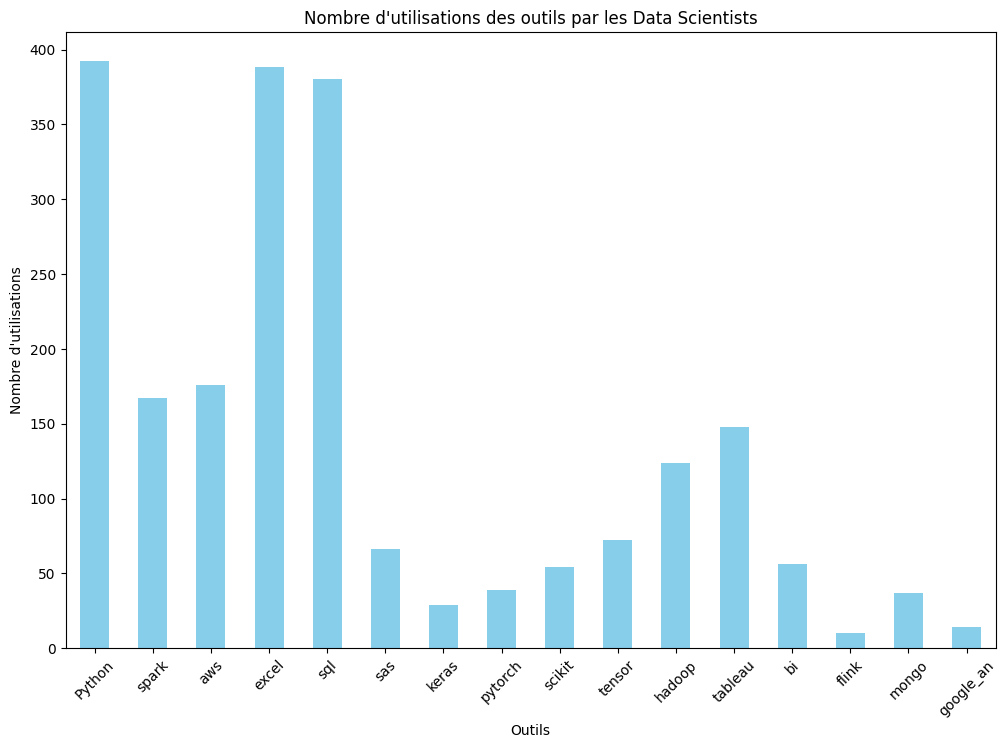

In [7]:
# Diagramme en barres des outils
plt.figure(figsize=(12, 8))
tool_counts.plot(kind='bar', color='skyblue')
plt.title('Nombre d\'utilisations des outils par les Data Scientists')
plt.xlabel('Outils')
plt.ylabel('Nombre d\'utilisations')
plt.xticks(rotation=45)
plt.show()

In [8]:
### 2. Corrélation entre les outils

In [9]:
# Calculer la matrice de corrélation
correlation_matrix = df[tools].corr()
correlation_matrix

,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
Python,1.000000,0.347619,0.203221,-0.021519,0.373999,0.086607,0.190566,0.113676,0.254331,0.209430,0.235114,0.154118,0.167770,0.063615,0.080035,-0.027705
spark,0.347619,1.000000,0.298822,-0.047334,0.261304,-0.055031,0.107790,0.032138,0.271394,0.237612,0.537081,-0.018655,-0.044026,0.216880,0.232356,-0.051017
aws,0.203221,0.298822,1.000000,-0.019235,0.106902,-0.140850,0.132776,0.110025,0.087712,0.116905,0.276749,-0.000834,0.032589,0.154647,0.177929,-0.077330
excel,-0.021519,-0.047334,-0.019235,1.000000,0.109548,0.052017,-0.030136,-0.065215,-0.023238,-0.078846,0.022847,0.145915,0.068613,-0.028762,0.094860,0.112628
sql,0.373999,0.261304,0.106902,0.109548,1.000000,0.200788,0.015975,-0.011757,0.096994,0.037589,0.278207,0.379234,0.248244,-0.049602,0.198825,0.056085
sas,0.086607,-0.055031,-0.140850,0.052017,0.200788,1.000000,-0.063016,-0.052381,0.021811,-0.054448,-0.076515,0.152072,0.054106,-0.036521,0.102419,0.095853
keras,0.190566,0.107790,0.132776,-0.030136,0.015975,-0.063016,1.000000,0.357628,0.505696,0.544731,0.002864,-0.031054,-0.057622,-0.023572,0.049647,0.023145
pytorch,0.113676,0.032138,0.110025,-0.065215,-0.011757,-0.052381,0.357628,1.000000,0.398992,0.636887,-0.040753,-0.117569,-0.067296,-0.027530,-0.053959,-0.032663
scikit,0.254331,0.271394,0.087712,-0.023238,0.096994,0.021811,0.505696,0.398992,1.000000,0.521607,0.138724,-0.035976,-0.001482,0.057243,0.031159,-0.000719
tensor,0.209430,0.237612,0.116905,-0.078846,0.037589,-0.054448,0.544731,0.636887,0.521607,1.000000,-0.012599,-0.129449,-0.093661,0.119629,-0.012347,-0.011996


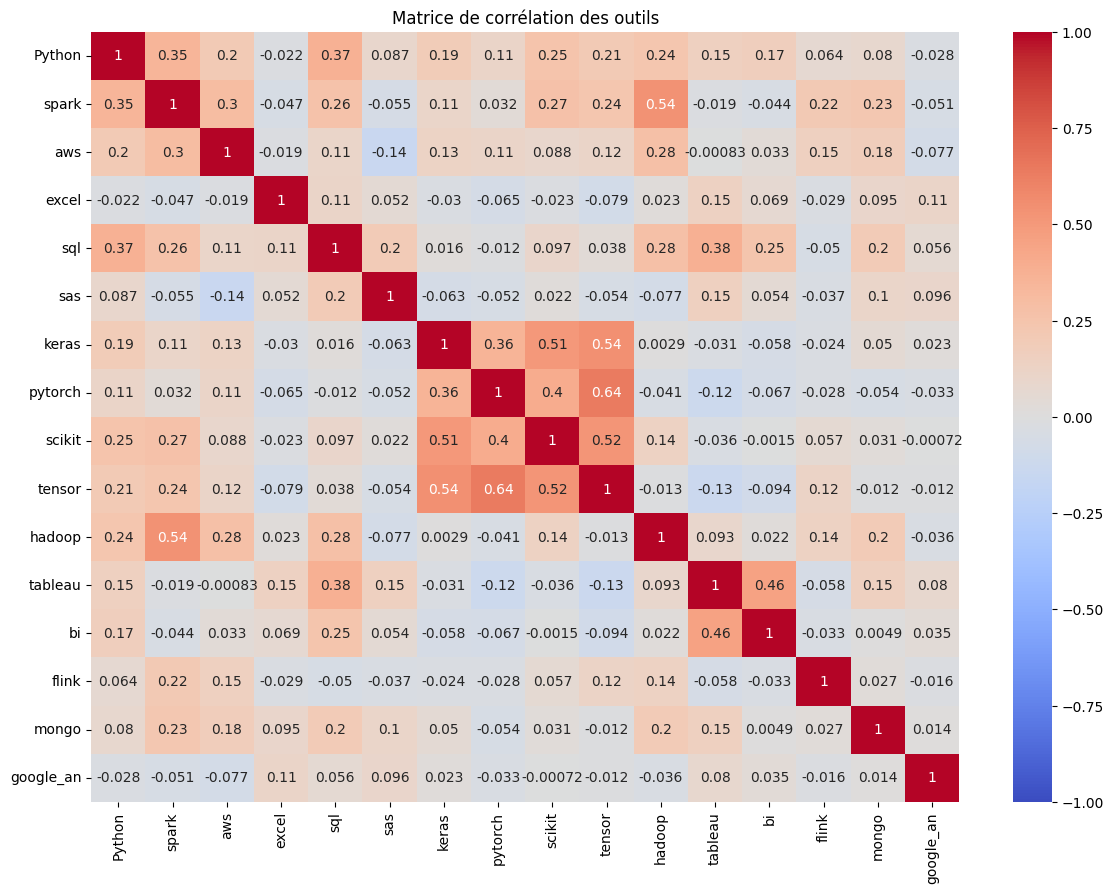

In [10]:
# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation des outils')
plt.show()

In [11]:
### 3. Modèle prédictif (Régression linéaire)

In [18]:
# Fonction pour extraire le salaire médian
def parse_salary(salary):
    if isinstance(salary, float):
        return salary
    salary = salary.split('(')[0].replace('K', '').replace('$', '').replace('Employer Provided Salary:', '').strip()
    if '-' in salary:
        try:
            return (int(salary.split('-')[0]) + int(salary.split('-')[1])) / 2
        except ValueError:
            return None
    try:
        return int(salary)
    except ValueError:
        return None

# Appliquons la fonction à la colonne 'Salary Estimate'
df['Salary Estimate'] = df['Salary Estimate'].apply(parse_salary)

# Supprimons des lignes avec des valeurs de salaire non numériques
df = df.dropna(subset=['Salary Estimate'])

# Séparons les caractéristiques (outils) et la cible (salaire)
X = df[tools]
y = df['Salary Estimate']

# Divisons les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créeons le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Faisons les prédictions
y_pred = model.predict(X_test)

# Évaluons le modèle
mse = mean_squared_error(y_test, y_pred)
print(f'Erreur quadratique moyenne: {mse}')

Erreur quadratique moyenne: 1028.498063970157


In [20]:
# Calculer la baseline (prédiction naïve)
baseline_pred = np.mean(y_train)
baseline_pred

103.5801393728223

In [21]:
# Calculer l'erreur quadratique moyenne pour la baseline
baseline_mse = mean_squared_error(y_test, [baseline_pred] * len(y_test))
print(f'Erreur quadratique moyenne de la baseline: {baseline_mse}')

Erreur quadratique moyenne de la baseline: 1171.1310896148564


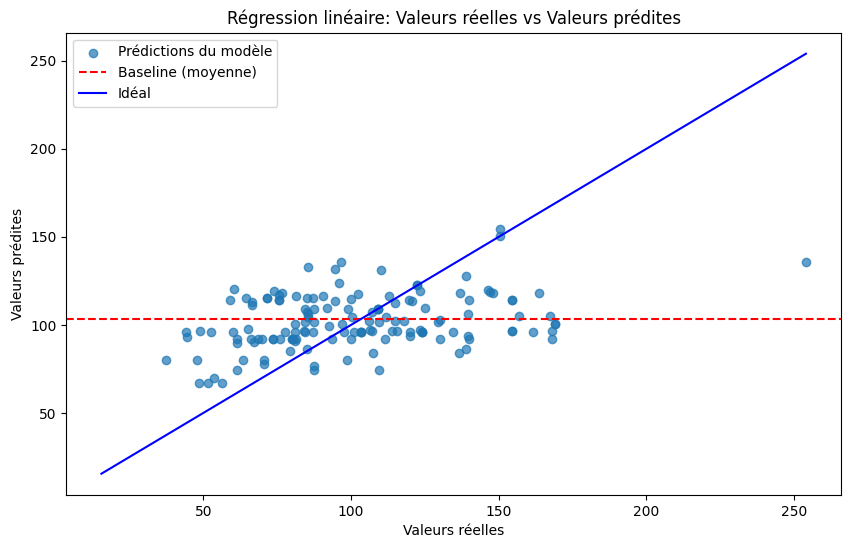

In [22]:
# Tracer les valeurs réelles par rapport aux valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Prédictions du modèle')
plt.axhline(y=baseline_pred, color='r', linestyle='--', label='Baseline (moyenne)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='blue', linestyle='-', label='Idéal')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Régression linéaire: Valeurs réelles vs Valeurs prédites')
plt.legend()
plt.show()

In [23]:
# Supposons que nous ayons de nouvelles données sous forme de DataFrame
new_data = pd.DataFrame({
    'Python': [1, 0],
    'spark': [0, 1],
    'aws': [1, 1],
    'excel': [1, 0],
    'sql': [1, 1],
    'sas': [0, 0],
    'keras': [0, 1],
    'pytorch': [0, 0],
    'scikit': [1, 1],
    'tensor': [0, 1],
    'hadoop': [0, 0],
    'tableau': [1, 1],
    'bi': [0, 0],
    'flink': [0, 1],
    'mongo': [0, 0],
    'google_an': [0, 0]
})

# Utiliser le modèle entraîné pour faire des prédictions sur les nouvelles données
new_predictions = model.predict(new_data)
print(f'Prédictions des salaires pour les nouvelles données: {new_predictions}')

Prédictions des salaires pour les nouvelles données: [124.93629097 114.30374075]
